# Title : "Optimizing Supply Chain Management for Instant Noodles Delivery:¶

## Intro - Business Problem Statement :
An FMCG company entered into the instant noodles business two years back. Their higher management has noticed that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both ways, it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in every warehouse in the entire country.


## Goal & Objective: 
1) This exercise aims to build a model, using historical data that will determine the optimum weight of the product to be shipped each time to the warehouse.
2) Also, try to analyze the demand pattern in different pockets of the country so management can drive the advertisement campaign, particularly in those pockets.
3) This is the first phase of the agreement; hence, the company has shared very limited information. Once you are able to showcase a tangible impact with this much information then the company will open the
4) 360-degree data lake for your consulting company to build a more robust model.


# Data Dictionary" or "Key Fields Description :
Here is a summary of the key fields in the dataset:

| Field Name             | Description                                            |
|------------------------|--------------------------------------------------------|
| Warehouse_id           | Unique identifier for each product warehouse.         |
| WH_Manager_ID          | Employee ID of the warehouse manager.                 |
| Location_type          | Categorization of warehouse location (city or village).|
| WH_capacity_size       | Storage capacity of the warehouse.                    |
| Zone                   | Geographical zone of the warehouse.                   |
| WH_regional_zone       | Regional zone of the warehouse under each zone.       |
| num_refill_req_l3m     | Number of times refilling requested in the last 3 months.|
| transport_issue_l1y    | Indicator of any transport issues reported in the last year.|
| Competitor_in_mkt      | Number of instant noodles competitors in the market.  |
| retail_shop_num        | Number of retail shops selling the product under the warehouse area.|
| wh_owner_type          | Ownership type of the warehouse (company-owned or rented).|
| distributor_num        | Number of distributors working between the warehouse and retail shops.|
| flood_impacted         | Indicator if the warehouse is located in a flood-impacted area.|
| Flood_proof            | Indicator if the warehouse is flood-proof.             |
| electric_supply        | Indicator if the warehouse has electric backup (generator) for load shedding.|
| dist_from_hub          | Distance between the warehouse and the production hub (in kms).|
| workers_num            | Number of workers in the warehouse.                   |
| wh_est_year            | Year of warehouse establishment.                      |
| storage_issue_reported_l3m | Indicator of any storage issues reported in the last 3 months.|
| temp_reg_mach          | Indicator whether the warehouse has temperature regulating machines.|
| approved_wh_govt_certificate | Type of government certificate issued to the warehouse.|
| wh_breakdown_l3m       | Number of times the warehouse faced a breakdown in the last 3 months.|
| govt_check_l3m         | Number of times government officers visited the warehouse to check stored food quality.|
| product_wg_ton (Target_column) | Weight of the product (in tons) shipped in the last 3 months.|

This data dictionary provides essential information about each field in the dataset, helping you understand the dataset's structure and the role of each variable in the analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Dataset.csv")

In [3]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [5]:
df.shape

(25000, 24)

In [6]:
df_cat = df.select_dtypes(include = "object")

In [7]:
df_cat

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,wh_owner_type,approved_wh_govt_certificate
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,Rented,A
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,Company Owned,A
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,Company Owned,A
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,Rented,A+
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,Company Owned,C
...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,Rented,A
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,Company Owned,B
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,Rented,B+
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,Rented,A


In [8]:
df_num = df.select_dtypes(include = "int")

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.0,4.089040,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,0.773680,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,3.104200,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,4985.711560,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0
distributor_num,25000.0,42.418120,16.064329,15.0,29.0,42.0,56.0,70.0
flood_impacted,25000.0,0.098160,0.297537,0.0,0.0,0.0,0.0,1.0
flood_proof,25000.0,0.054640,0.227281,0.0,0.0,0.0,0.0,1.0
electric_supply,25000.0,0.656880,0.474761,0.0,0.0,1.0,1.0,1.0
dist_from_hub,25000.0,163.537320,62.718609,55.0,109.0,164.0,218.0,271.0
workers_num,24010.0,28.944398,7.872534,10.0,24.0,28.0,33.0,98.0


In [10]:
df.duplicated().sum()

0

In [11]:
df1 = df.copy()

In [12]:
df1

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,...,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,...,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,...,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,...,1,60,25.0,NaN,18,0,A,6,30,25093


In [13]:
df1["approved_wh_govt_certificate"].value_counts()

approved_wh_govt_certificate
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: count, dtype: int64

## Handling Missing Values

In [14]:
df1.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [15]:
df.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

### workers_num 

<Axes: xlabel='workers_num', ylabel='Count'>

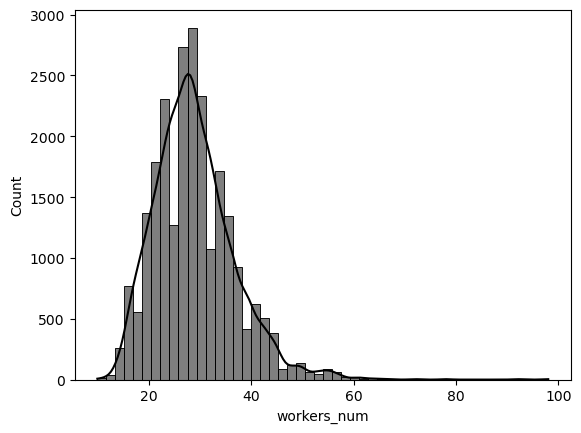

In [16]:
sns.histplot(df['workers_num'], bins=50, kde=True, color='black')

<Axes: >

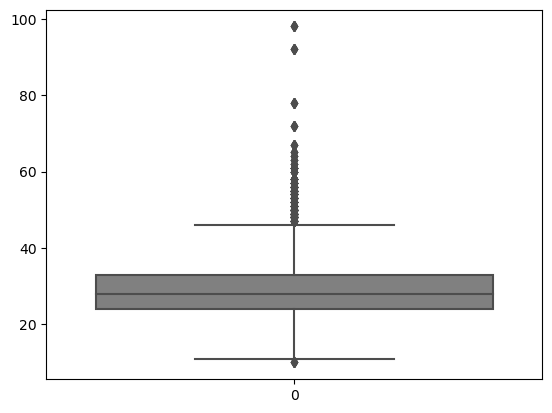

In [17]:
sns.boxplot(df['workers_num'],  color='gray')

## Outlier Treatments

In [78]:
# Columns with potential outliers
columns_with_outliers = ['workers_num']

# Function to handle outliers using IQR method with capping
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, np.where(df[column] > upper_bound, upper_bound, df[column]))

handle_outliers(df1, 'workers_num')
# Outliers are replaced with Capping method.

<Axes: >

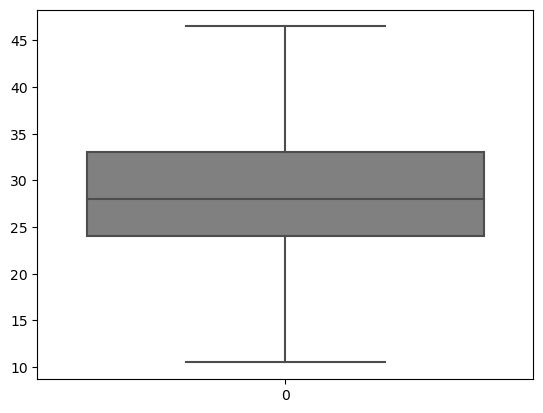

In [80]:
sns.boxplot(df1['workers_num'],  color='gray')

Median Imputation:

Applicability: Median imputation is robust to outliers and is suitable for variables with skewed distributions.

Advantages: It is less influenced by extreme values, making it a better choice when the distribution is not symmetric or when outliers are present.

In [71]:
df1

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,1,3,5,3,1,2,4651,1,24,...,1,1,91,29.0,13,0,4,5,15,17115
1,0,3,1,4,0,0,4,6217,0,47,...,0,1,210,31.0,4,0,4,3,17,5074
2,0,2,2,1,1,0,4,4306,0,64,...,0,0,161,37.0,17,0,4,6,22,23137
3,0,2,1,2,7,4,2,6000,1,50,...,0,0,103,21.0,17,1,5,3,27,22115
4,0,3,1,4,3,1,2,4740,0,42,...,0,1,112,25.0,18,0,1,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,1,1,0,3,0,4,5390,1,19,...,0,1,142,34.0,22,1,4,2,30,32093
24996,0,2,3,1,6,0,4,4490,0,57,...,0,1,130,28.0,10,0,2,4,18,12114
24997,1,3,2,4,7,0,2,5403,1,31,...,0,1,147,28.0,23,0,3,5,25,27080
24998,0,1,1,0,1,0,2,10562,1,25,...,0,1,60,25.0,18,0,4,6,30,25093


#### Choose Imputation Method Impute Missing Values:

In [18]:
imputation_value = df1['workers_num'].median()
df1['workers_num'] = df1['workers_num'].fillna(imputation_value)

In [72]:
df1['workers_num'].isnull().sum()

0

### approved_wh_govt_certificate

In [20]:
df1["approved_wh_govt_certificate"].mode()[0]

'C'

In [21]:
df1['approved_wh_govt_certificate'].fillna(df['approved_wh_govt_certificate'].mode()[0],inplace=True)

In [22]:
# The percentage of missing values is more so we drop this columns from the datasets

df1 = df1.drop("wh_est_year", axis = 1)

### wh_est_year

In [23]:
df.shape

(25000, 24)

## Encoding

In [24]:
df_cat2 = ['Location_type',
 'zone',
 'WH_regional_zone',
 'wh_owner_type']

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in df_cat2:
    df1[column] = label_encoder.fit_transform(df1[column])

In [26]:
ordinal_mapping = {
    'C': 1,
    'B': 2,
    'B+': 3,
    'A': 4,
    'A+': 5
}

df1['approved_wh_govt_certificate'] = df1['approved_wh_govt_certificate'].map(ordinal_mapping)

In [27]:
ordinal_mapping = {
    'Small': 1,
    'Mid': 2,
    'Large': 3}
    
df1['WH_capacity_size'] = df1['WH_capacity_size'].map(ordinal_mapping)

In [28]:
df1 = df1.drop(columns = ["Ware_house_ID", "WH_Manager_ID"], axis = 1)

In [29]:
df1

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,1,3,5,3,1,2,4651,1,24,...,1,1,91,29.0,13,0,4,5,15,17115
1,0,3,1,4,0,0,4,6217,0,47,...,0,1,210,31.0,4,0,4,3,17,5074
2,0,2,2,1,1,0,4,4306,0,64,...,0,0,161,37.0,17,0,4,6,22,23137
3,0,2,1,2,7,4,2,6000,1,50,...,0,0,103,21.0,17,1,5,3,27,22115
4,0,3,1,4,3,1,2,4740,0,42,...,0,1,112,25.0,18,0,1,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,1,1,0,3,0,4,5390,1,19,...,0,1,142,34.0,22,1,4,2,30,32093
24996,0,2,3,1,6,0,4,4490,0,57,...,0,1,130,28.0,10,0,2,4,18,12114
24997,1,3,2,4,7,0,2,5403,1,31,...,0,1,147,28.0,23,0,3,5,25,27080
24998,0,1,1,0,1,0,2,10562,1,25,...,0,1,60,25.0,18,0,4,6,30,25093


## Hypothesis testing

In [30]:
from scipy.stats import ttest_ind, levene, shapiro

l = ["temp_reg_mach", "electric_supply", "flood_proof", "wh_owner_type", "Location_type"]


for i in (l):
    variable = i  

    # sample data for the variable and handle missing values
    
    group1 = df1[df1[variable] == 0]['product_wg_ton']
    group2 = df1[df1[variable] == 1]['product_wg_ton']


    # Shapiro-Wilk test
    statistic, p_value = shapiro(group1)
    print(f'Shapiro-Wilk Test for Normality (Group 1): p-value = {p_value}')

    statistic, p_value = shapiro(group2)
    print(f'Shapiro-Wilk Test for Normality (Group 2): p-value = {p_value}')

    # results
    print(f'Shapiro-Wilk test statistic: {statistic}')
    print(f'p-value: {p_value}')

    # Check the significance level
    alpha = 0.05
    if p_value > alpha:
        print(f"The data for '{variable}' appears to be normally distributed (fail to reject the null hypothesis)")
    else:
        print(f"The data for '{variable}' does not appear to be normally distributed (reject the null hypothesis)")
        
    print("--------------------------------------------------------------------------------------------------------")

Shapiro-Wilk Test for Normality (Group 1): p-value = 0.0
Shapiro-Wilk Test for Normality (Group 2): p-value = 6.1415696552160185e-37
Shapiro-Wilk test statistic: 0.9702039957046509
p-value: 6.1415696552160185e-37
The data for 'temp_reg_mach' does not appear to be normally distributed (reject the null hypothesis)
--------------------------------------------------------------------------------------------------------
Shapiro-Wilk Test for Normality (Group 1): p-value = 1.9395991418641025e-38
Shapiro-Wilk Test for Normality (Group 2): p-value = 0.0
Shapiro-Wilk test statistic: 0.970162034034729
p-value: 0.0
The data for 'electric_supply' does not appear to be normally distributed (reject the null hypothesis)
--------------------------------------------------------------------------------------------------------
Shapiro-Wilk Test for Normality (Group 1): p-value = 0.0
Shapiro-Wilk Test for Normality (Group 2): p-value = 2.7849220401903797e-16
Shapiro-Wilk test statistic: 0.9698413014411926

In [31]:
l = ["temp_reg_mach", "electric_supply", "flood_proof", "wh_owner_type", "Location_type"]


for i in (l):
    variable = i  

    
    group1 = df1[df1[variable] == 0]['product_wg_ton']
    group2 = df1[df1[variable] == 1]['product_wg_ton']


    # Check homogeneity of variances
    statistic, p_value = levene(group1, group2)
    print(f'Levene\'s Test for Homogeneity of Variances: p-value = {p_value}')
    
    # Check the significance level
    alpha = 0.05
    if p_value > alpha:
        print(f"The data for '{variable}' appears to be homogeneity of variances (fail to reject the null hypothesis)")
    else:
        print(f"The data for '{variable}' does not homogeneity of variances (reject the null hypothesis)")
        
    print("--------------------------------------------------------------------------------------------------------")

Levene's Test for Homogeneity of Variances: p-value = 1.745099040208853e-05
The data for 'temp_reg_mach' does not homogeneity of variances (reject the null hypothesis)
--------------------------------------------------------------------------------------------------------
Levene's Test for Homogeneity of Variances: p-value = 0.32232887887916295
The data for 'electric_supply' appears to be homogeneity of variances (fail to reject the null hypothesis)
--------------------------------------------------------------------------------------------------------
Levene's Test for Homogeneity of Variances: p-value = 0.8339989799709617
The data for 'flood_proof' appears to be homogeneity of variances (fail to reject the null hypothesis)
--------------------------------------------------------------------------------------------------------
Levene's Test for Homogeneity of Variances: p-value = 0.6202689485337454
The data for 'wh_owner_type' appears to be homogeneity of variances (fail to reject the

In [32]:
from scipy.stats import mannwhitneyu

for i in (l):
    variable = i  

    # sample data for the variable and handle missing values
    
    group1 = df1[df1[variable] == 0]['product_wg_ton']
    group2 = df1[df1[variable] == 1]['product_wg_ton']
    
    # Assuming 'group1' and 'group2' are your two groups
    statistic, mw_p_value = mannwhitneyu(group1, group2)
    print(f"Mann-Whitney U test p-value: {mw_p_value}")
    
    alpha = 0.05

    if mw_p_value > alpha:
        print(f"The data for '{variable}' are no significant differences (fail to reject the null hypothesis)")
    else:
        print(f"The data for '{variable}' sample distributions are not equal (reject the null hypothesis)")
          
    print("-----------------------------------------------------------------------------------------------------")

Mann-Whitney U test p-value: 4.7083221805811675e-52
The data for 'temp_reg_mach' sample distributions are not equal (reject the null hypothesis)
-----------------------------------------------------------------------------------------------------
Mann-Whitney U test p-value: 0.8899029484423544
The data for 'electric_supply' are no significant differences (fail to reject the null hypothesis)
-----------------------------------------------------------------------------------------------------
Mann-Whitney U test p-value: 0.935624850285302
The data for 'flood_proof' are no significant differences (fail to reject the null hypothesis)
-----------------------------------------------------------------------------------------------------
Mann-Whitney U test p-value: 0.3644198640633599
The data for 'wh_owner_type' are no significant differences (fail to reject the null hypothesis)
-----------------------------------------------------------------------------------------------------
Mann-Whitney 

## EDA (Exploratory data analysis)

In [33]:
df_num.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [34]:
df_num.shape

(25000, 14)

In [35]:
df_cat.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [36]:
df_cat.shape

(25000, 8)

In [37]:
df_num

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,3,1,2,4651,24,0,1,1,91,13,0,5,15,17115
1,0,0,4,6217,47,0,0,1,210,4,0,3,17,5074
2,1,0,4,4306,64,0,0,0,161,17,0,6,22,23137
3,7,4,2,6000,50,0,0,0,103,17,1,3,27,22115
4,3,1,2,4740,42,1,0,1,112,18,0,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,3,0,4,5390,19,0,0,1,142,22,1,2,30,32093
24996,6,0,4,4490,57,0,0,1,130,10,0,4,18,12114
24997,7,0,2,5403,31,1,0,1,147,23,0,5,25,27080
24998,1,0,2,10562,25,0,0,1,60,18,0,6,30,25093


In [38]:
df["wh_breakdown_l3m"].value_counts()

wh_breakdown_l3m
2    5076
3    5006
4    4037
6    4012
5    3925
1    2036
0     908
Name: count, dtype: int64

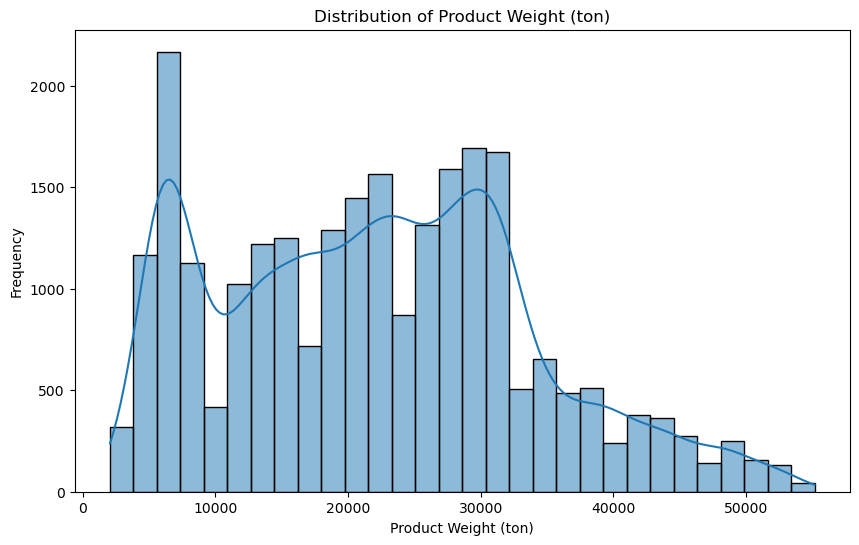

In [39]:
# Distribution plot for the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['product_wg_ton'], bins=30, kde=True, palette='cubehelix')
plt.title('Distribution of Product Weight (ton)')
plt.xlabel('Product Weight (ton)')
plt.ylabel('Frequency')
plt.show()

In [40]:
df_num.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

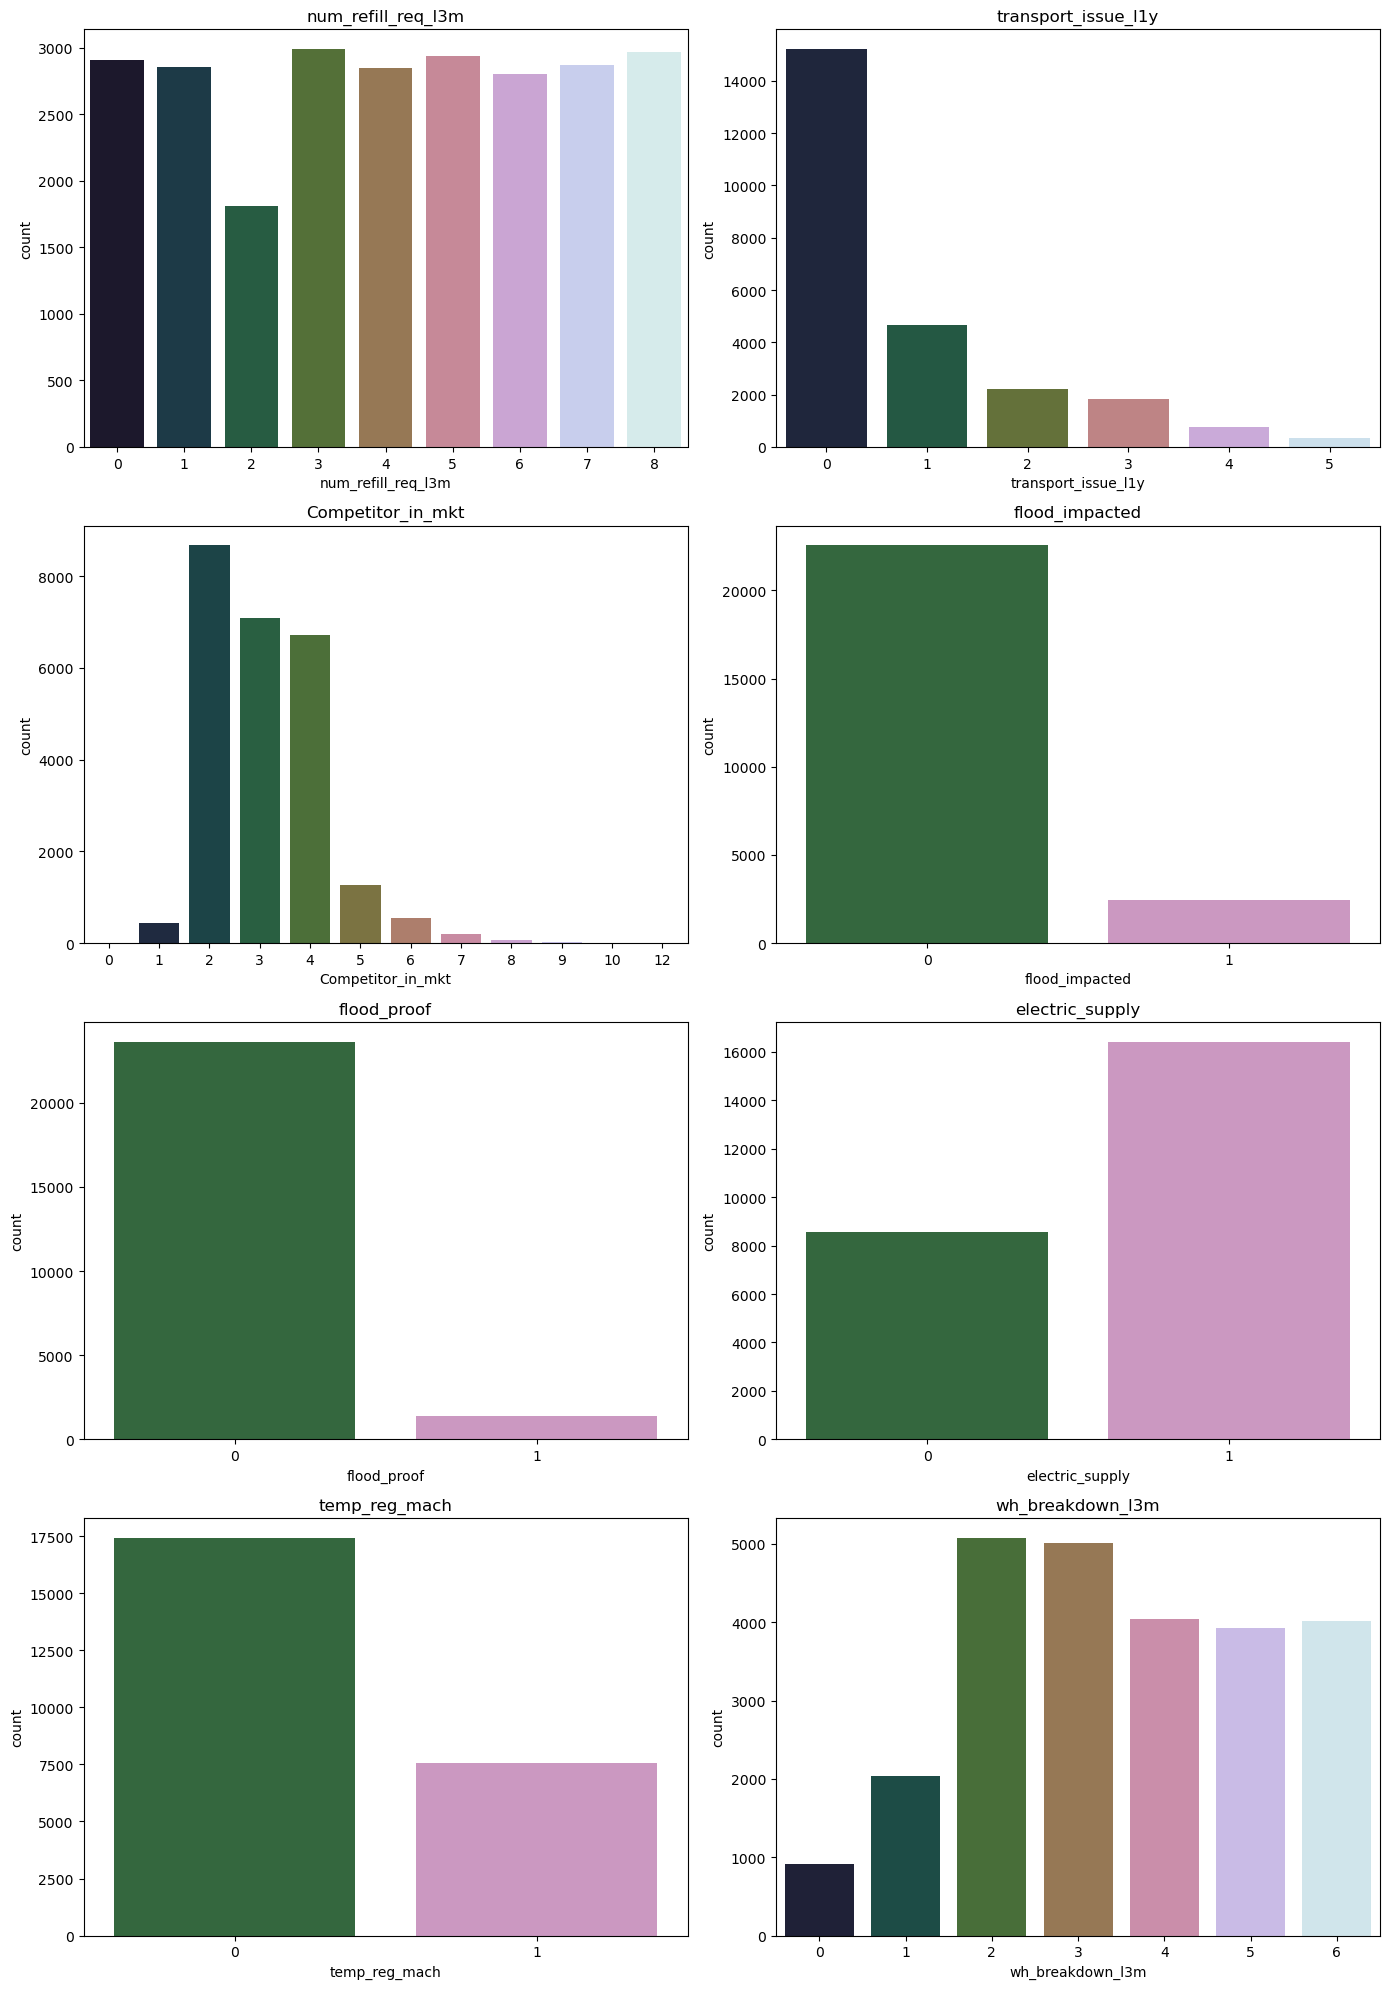

In [41]:
df_num_cat = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'flood_impacted', 'flood_proof', 'electric_supply',
       'temp_reg_mach', 'wh_breakdown_l3m']
              

# Boxplot for each variable with respect to Potability
plt.figure(figsize=(14, 20))
for i, column in enumerate(df_num_cat):
    plt.subplot(4, 2, i+1)
    sns.countplot(x= column , data=df, palette='cubehelix')
    plt.title(column)
plt.tight_layout()
plt.show()

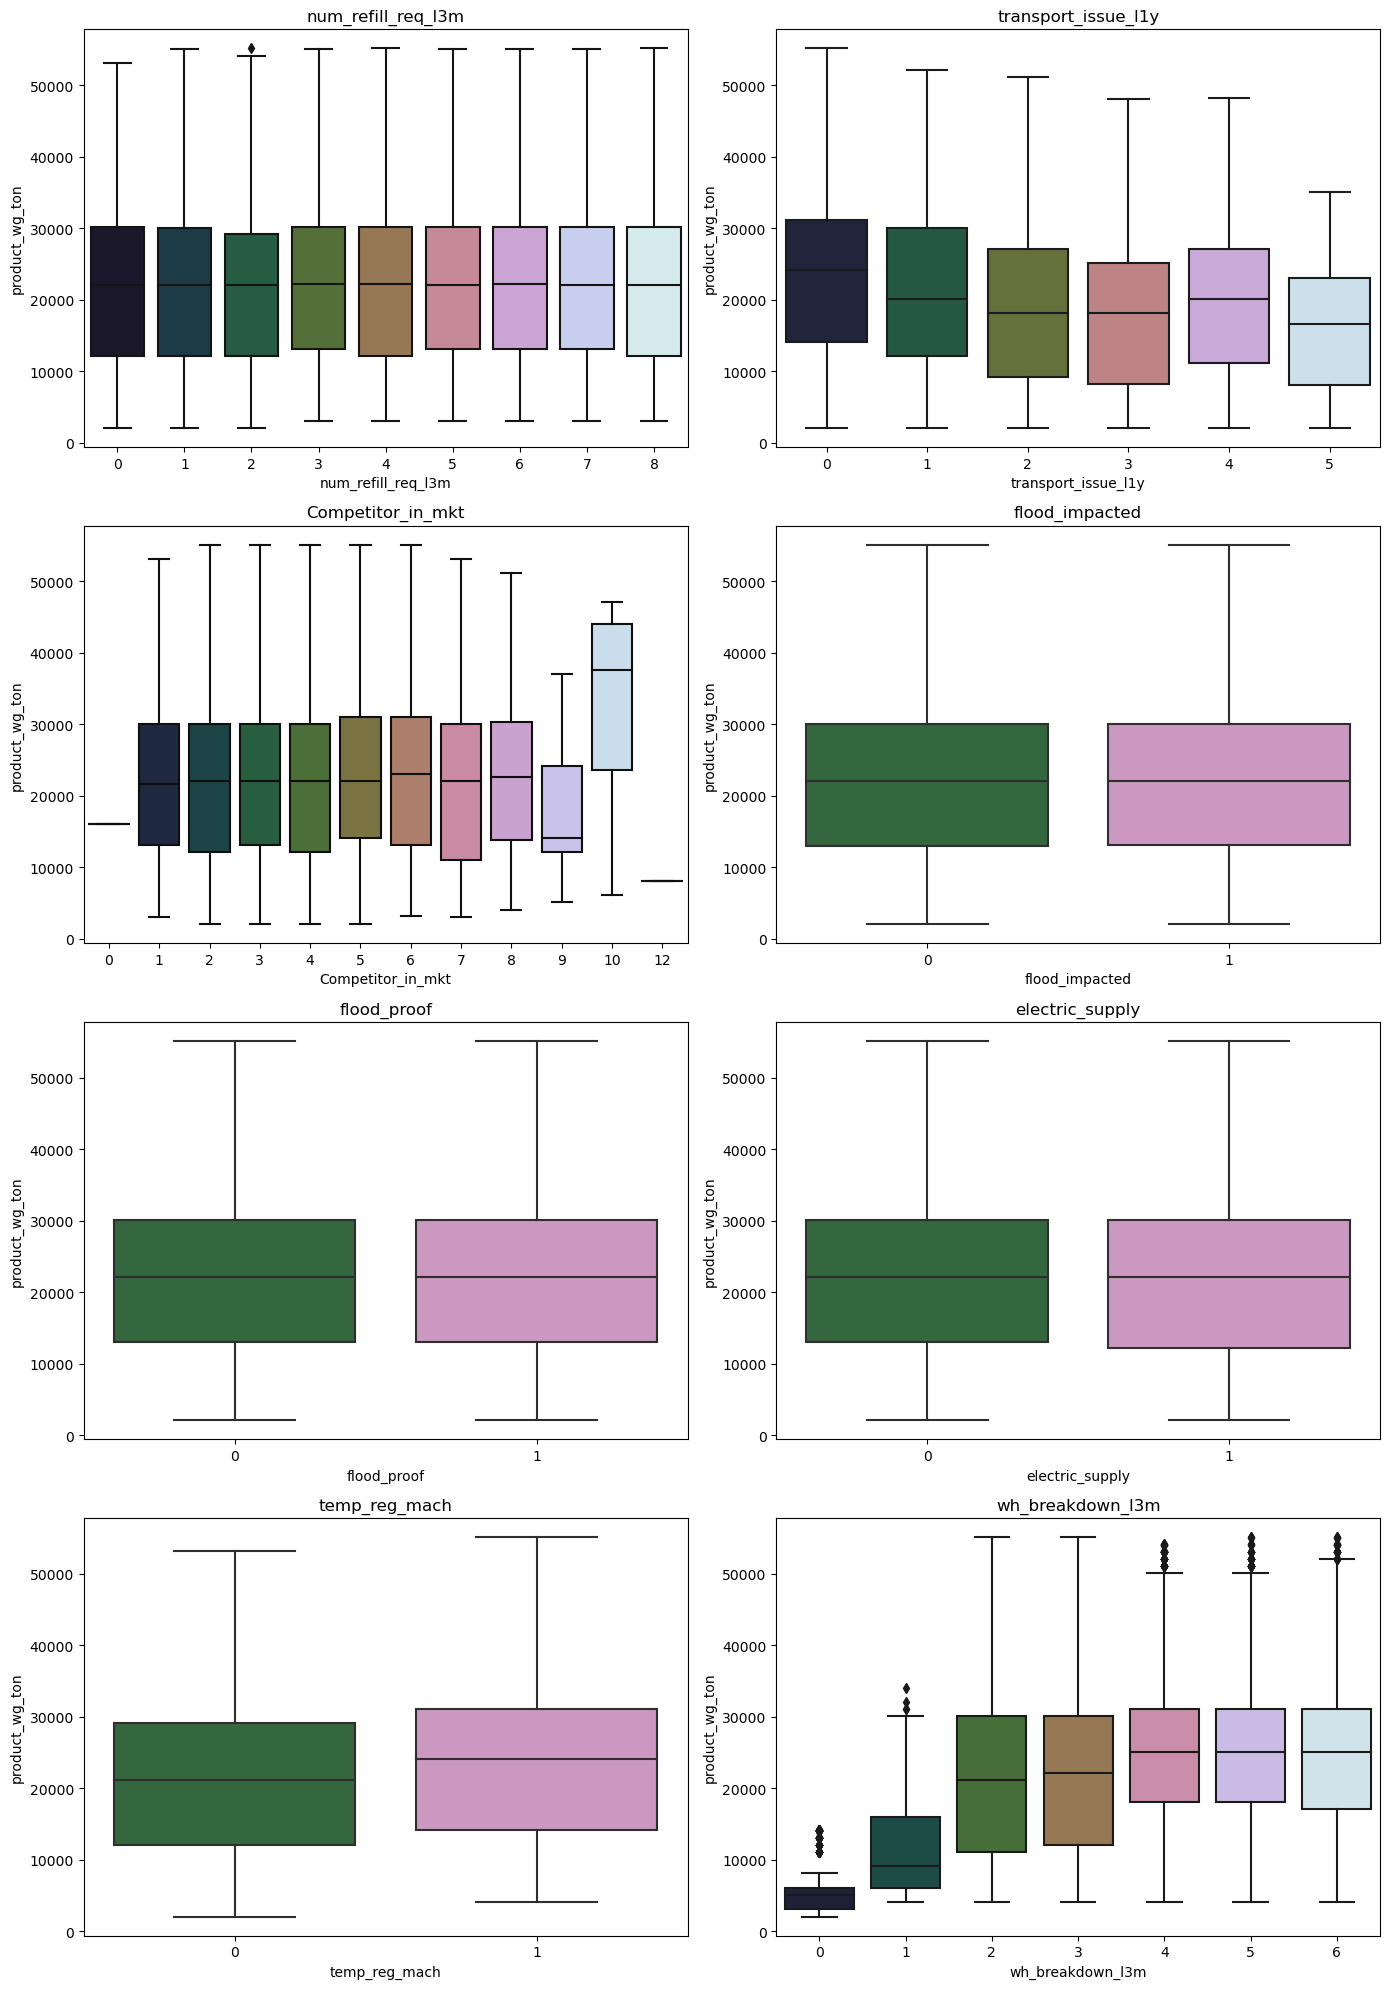

In [42]:
# Boxplot for each variable with respect to Potability
plt.figure(figsize=(14, 20))
for i, column in enumerate(df_num_cat):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x= column ,y = 'product_wg_ton', data=df, palette='cubehelix')
    plt.title(column)
plt.tight_layout()
plt.show()

In [43]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


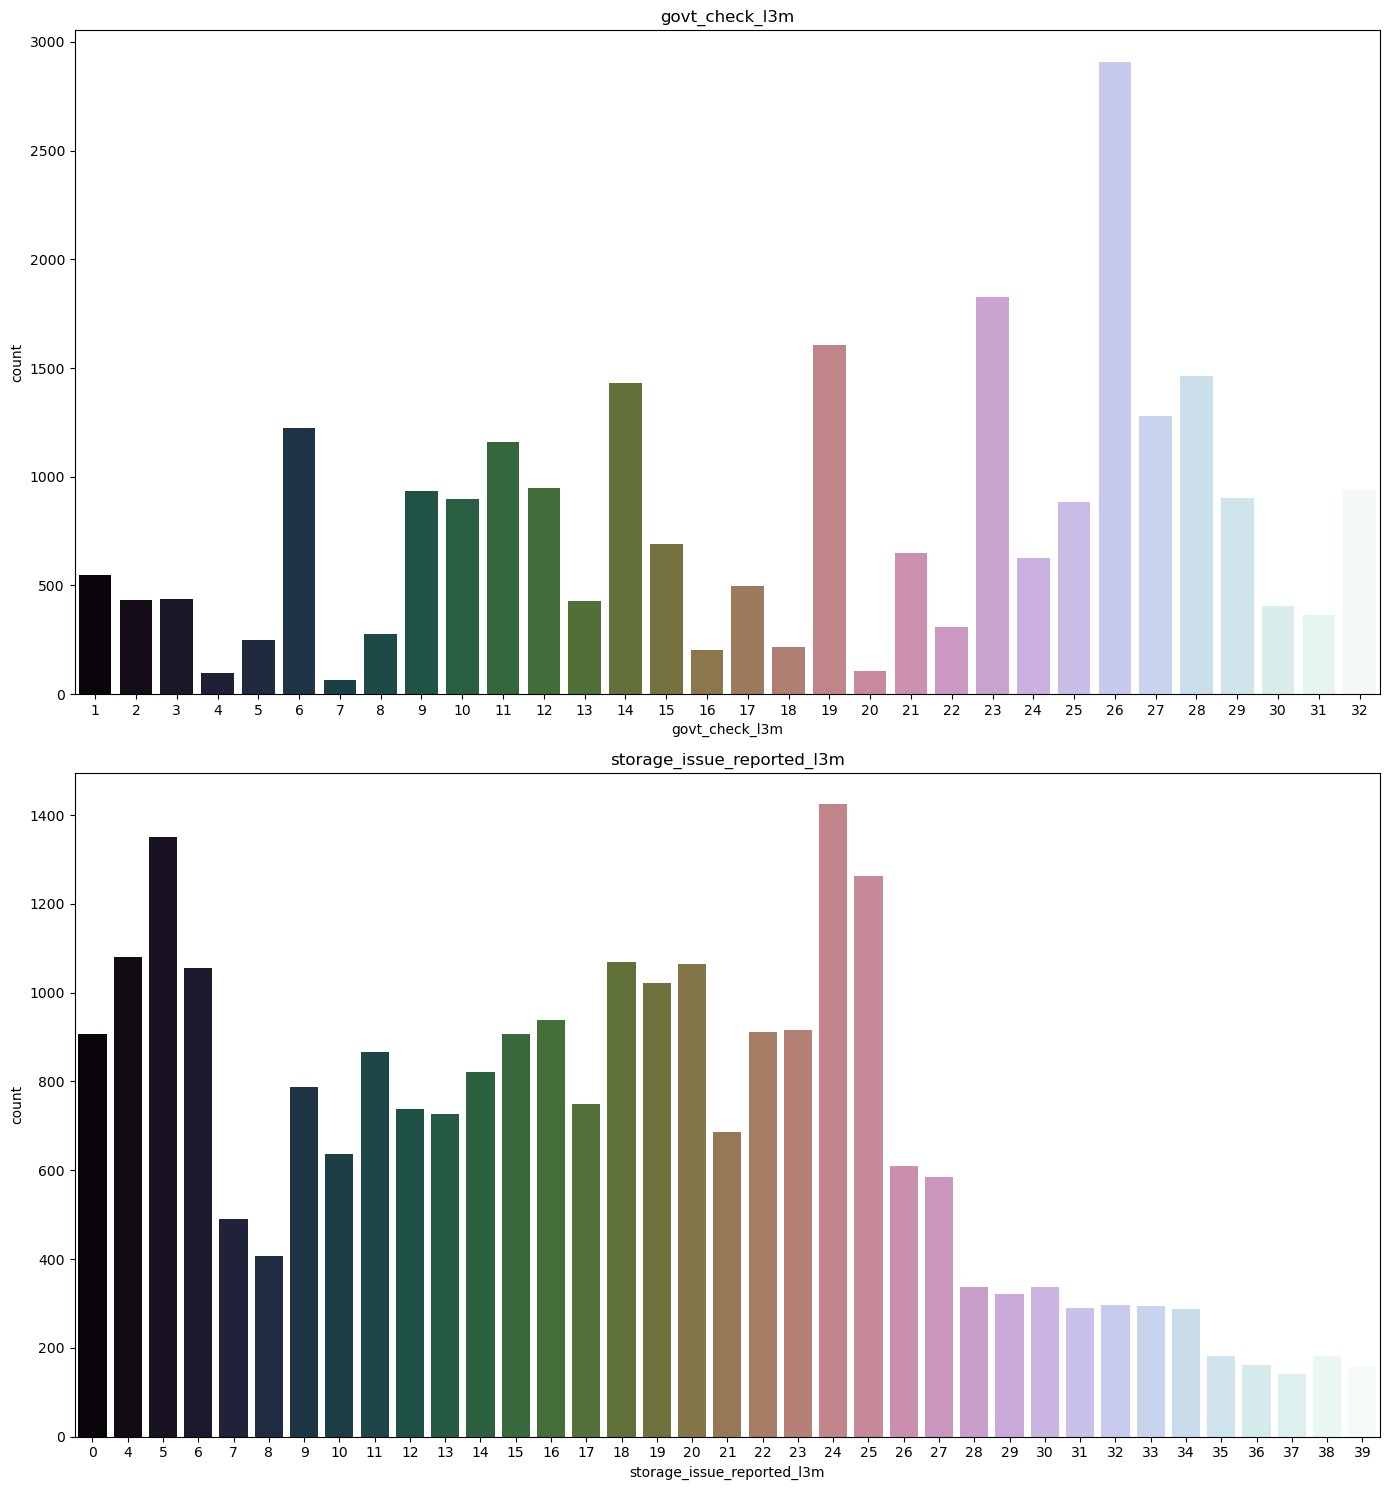

In [44]:
# Boxplot for each variable with respect to Potability
l = ["govt_check_l3m", "storage_issue_reported_l3m"]

plt.figure(figsize=(14, 15))
for i, column in enumerate(l):
    plt.subplot(2, 1, i+1)
    sns.countplot(x= column , data=df, palette='cubehelix')
    plt.title(column)
plt.tight_layout()
plt.show()

In [45]:
df_num.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,3,1,2,4651,24,0,1,1,91,13,0,5,15,17115
1,0,0,4,6217,47,0,0,1,210,4,0,3,17,5074
2,1,0,4,4306,64,0,0,0,161,17,0,6,22,23137
3,7,4,2,6000,50,0,0,0,103,17,1,3,27,22115
4,3,1,2,4740,42,1,0,1,112,18,0,6,24,24071


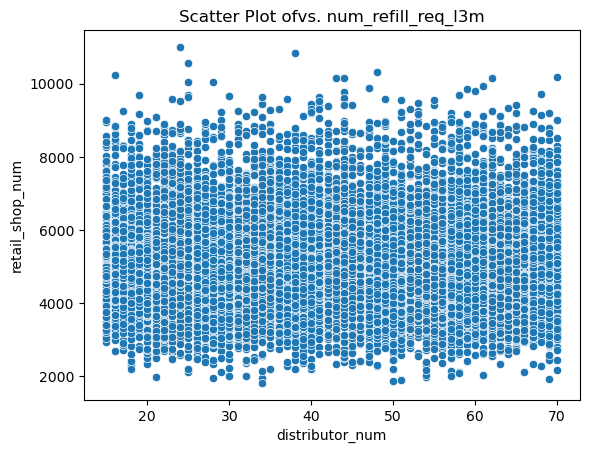

In [46]:
sns.scatterplot(x="distributor_num", y='retail_shop_num', data=df, palette='coolwarm')
plt.title('Scatter Plot ofvs. num_refill_req_l3m')
plt.show()

In [47]:
df_cat.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate'],
      dtype='object')

In [48]:
df_cat1 = ['Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate']

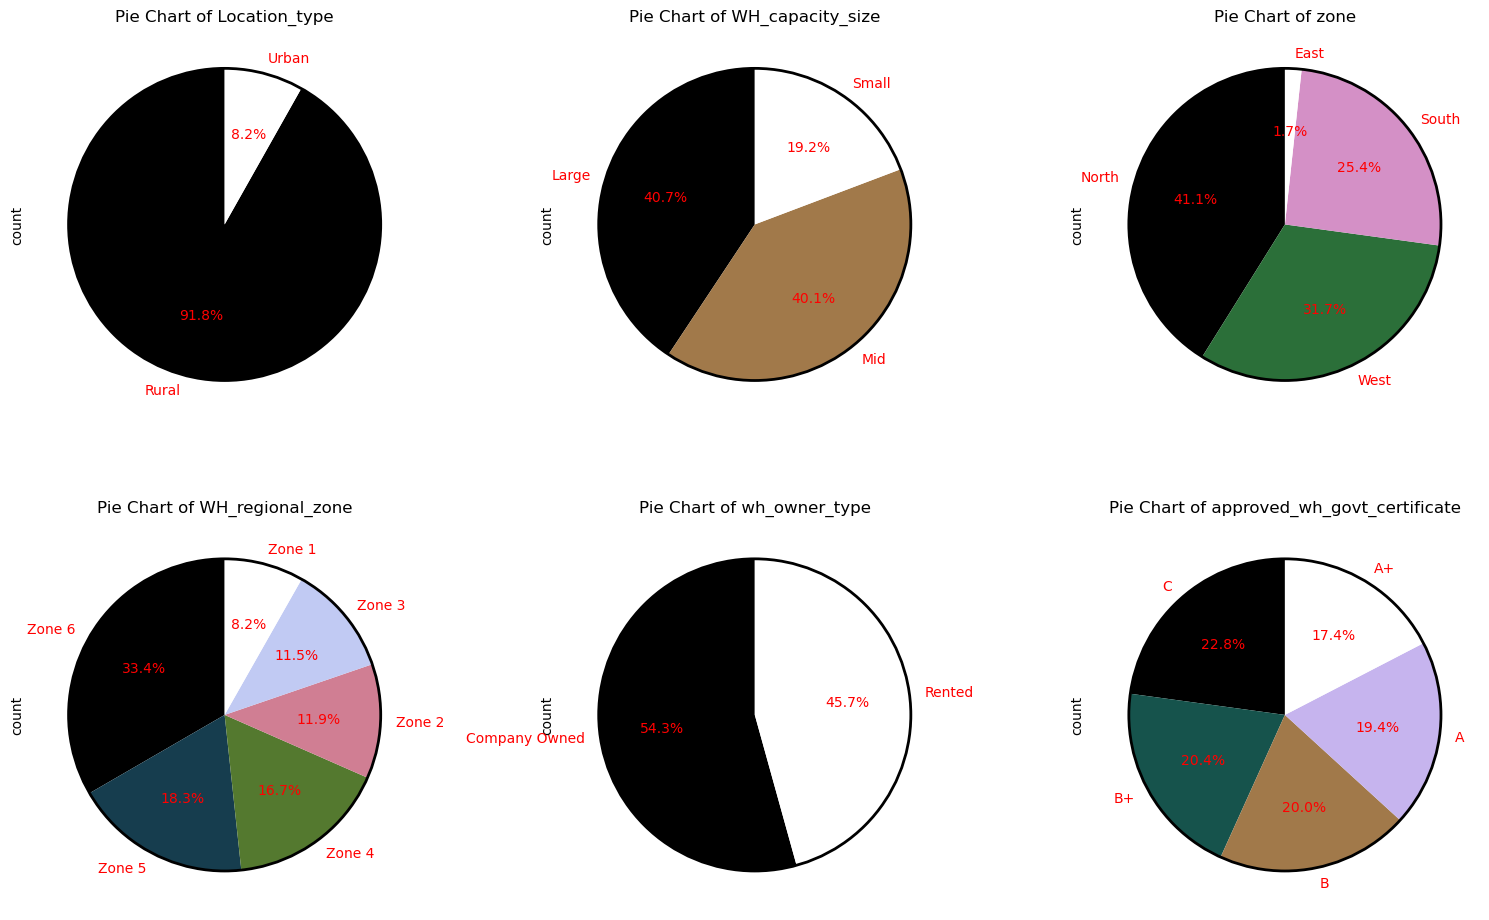

In [49]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_cat1):
    plt.subplot(2, 3, i+1)
    
    # Plot the pie chart with custom percentage label color
    df[column].value_counts().plot.pie(autopct=lambda p: '{:.1f}%'.format(p), 
                                       startangle=90, cmap='cubehelix', textprops={'color':'red'})
    
    # Create a circle patch to act as a border
    circle = plt.Circle((0, 0), 1, color='white', ec='black', fc='none', lw=2)
    
    # Add the circle patch to the plot
    plt.gca().add_patch(circle)
    
    plt.title(f'Pie Chart of {column}')

plt.tight_layout()
plt.show()

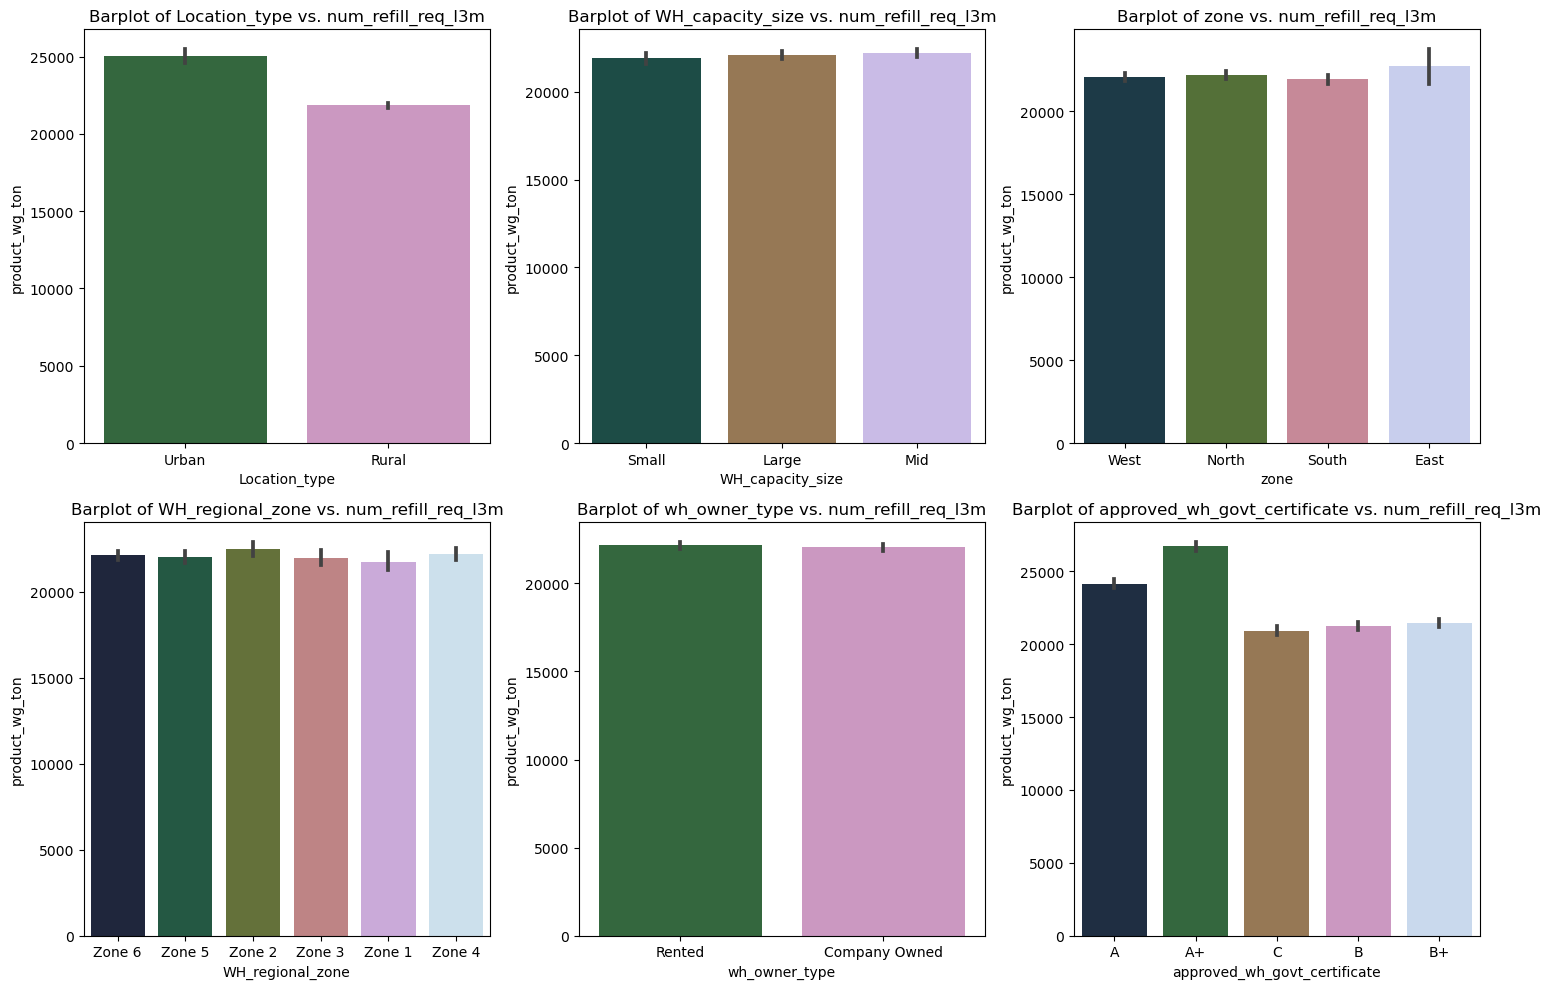

In [50]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_cat1):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=column, y='product_wg_ton', data=df, palette='cubehelix')
    plt.title(f'Barplot of {column} vs. num_refill_req_l3m')
plt.tight_layout()
plt.show()

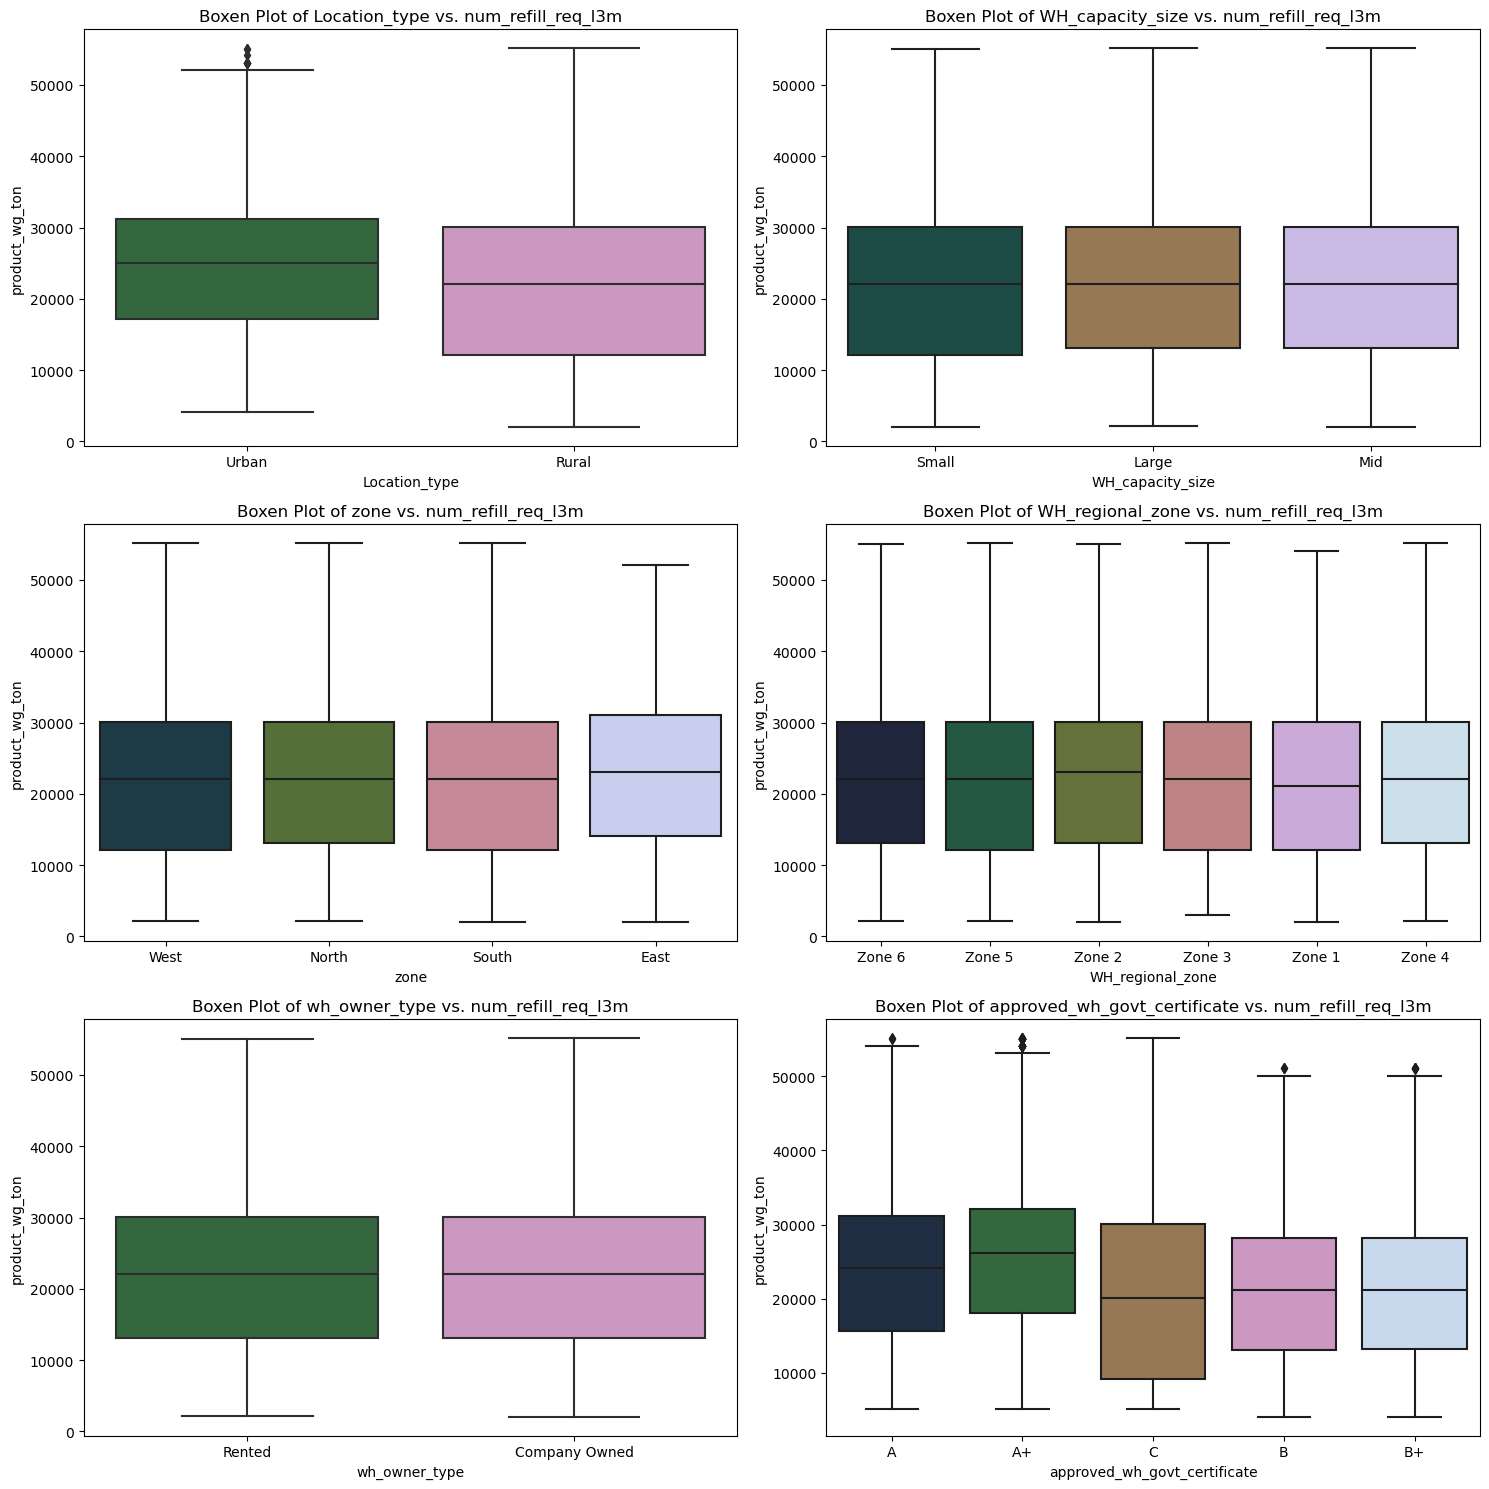

In [51]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(df_cat1, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=col, y='product_wg_ton', data=df, palette='cubehelix')
    plt.title(f'Boxen Plot of {col} vs. num_refill_req_l3m')

plt.tight_layout()
plt.show()

In [52]:
df_num.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [53]:
df1

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,1,1,3,5,3,1,2,4651,1,24,...,1,1,91,29.0,13,0,4,5,15,17115
1,0,3,1,4,0,0,4,6217,0,47,...,0,1,210,31.0,4,0,4,3,17,5074
2,0,2,2,1,1,0,4,4306,0,64,...,0,0,161,37.0,17,0,4,6,22,23137
3,0,2,1,2,7,4,2,6000,1,50,...,0,0,103,21.0,17,1,5,3,27,22115
4,0,3,1,4,3,1,2,4740,0,42,...,0,1,112,25.0,18,0,1,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0,1,1,0,3,0,4,5390,1,19,...,0,1,142,34.0,22,1,4,2,30,32093
24996,0,2,3,1,6,0,4,4490,0,57,...,0,1,130,28.0,10,0,2,4,18,12114
24997,1,3,2,4,7,0,2,5403,1,31,...,0,1,147,28.0,23,0,3,5,25,27080
24998,0,1,1,0,1,0,2,10562,1,25,...,0,1,60,25.0,18,0,4,6,30,25093


In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  int32  
 1   WH_capacity_size              25000 non-null  int64  
 2   zone                          25000 non-null  int32  
 3   WH_regional_zone              25000 non-null  int32  
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  int32  
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [55]:
df1["approved_wh_govt_certificate"].value_counts()

approved_wh_govt_certificate
1    6409
3    4917
2    4812
4    4671
5    4191
Name: count, dtype: int64

## Multivarient Analysis

In [56]:
correlation_matrix = df1.corr()
correlation_matrix

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
Location_type,1.000000,0.008470,-0.005634,0.006082,0.016419,0.009298,0.011143,-0.000720,0.003399,-0.002565,...,0.002808,-0.004615,-0.005915,-0.002592,0.078621,0.022363,0.025959,0.047270,0.003053,0.074567
WH_capacity_size,0.008470,1.000000,-0.082726,0.485130,0.007054,-0.011046,-0.014475,-0.068853,0.000436,0.001268,...,0.001003,0.009338,0.001837,0.000685,0.005454,0.001056,0.002933,0.000357,0.146946,0.004425
zone,-0.005634,-0.082726,1.000000,-0.062199,0.009299,-0.006770,0.139395,-0.053030,-0.008516,0.006697,...,0.006200,-0.001593,0.007566,0.001906,-0.006444,0.009851,0.004855,0.010418,-0.195752,-0.006671
WH_regional_zone,0.006082,0.485130,-0.062199,1.000000,0.007988,-0.001561,0.030642,-0.022987,0.003826,0.000653,...,0.004957,0.005822,0.004838,0.007005,0.001415,-0.005500,-0.004704,-0.002127,-0.133086,0.000563
num_refill_req_l3m,0.016419,0.007054,0.009299,0.007988,1.000000,0.018549,0.002985,-0.001186,0.010474,0.003995,...,-0.001123,-0.007959,0.000048,-0.013665,-0.006602,0.260928,0.007352,0.000608,-0.003302,0.001415
transport_issue_l1y,0.009298,-0.011046,-0.006770,-0.001561,0.018549,1.000000,-0.005826,-0.001826,0.003617,0.008993,...,0.000022,-0.009299,0.014336,-0.008825,-0.144327,0.018207,0.002430,0.012990,0.002190,-0.173992
Competitor_in_mkt,0.011143,-0.014475,0.139395,0.030642,0.002985,-0.005826,1.000000,-0.156943,-0.006413,-0.001492,...,-0.003444,0.001759,0.008407,0.000174,0.009543,0.009524,0.007526,0.012733,-0.043455,0.008884
retail_shop_num,-0.000720,-0.068853,-0.053030,-0.022987,-0.001186,-0.001826,-0.156943,1.000000,0.009599,-0.000395,...,0.007223,-0.009207,0.000429,-0.005301,-0.006632,-0.001273,-0.005853,-0.008420,0.045749,-0.006615
wh_owner_type,0.003399,0.000436,-0.008516,0.003826,0.010474,0.003617,-0.006413,0.009599,1.000000,0.005745,...,-0.030066,-0.229841,-0.001972,-0.183318,0.005918,0.001212,0.004785,0.013593,0.014587,0.005807
distributor_num,-0.002565,0.001268,0.006697,0.000653,0.003995,0.008993,-0.001492,-0.000395,0.005745,1.000000,...,-0.003409,0.000454,-0.011838,-0.014359,0.003396,0.002827,0.003722,0.004286,-0.007934,0.004999


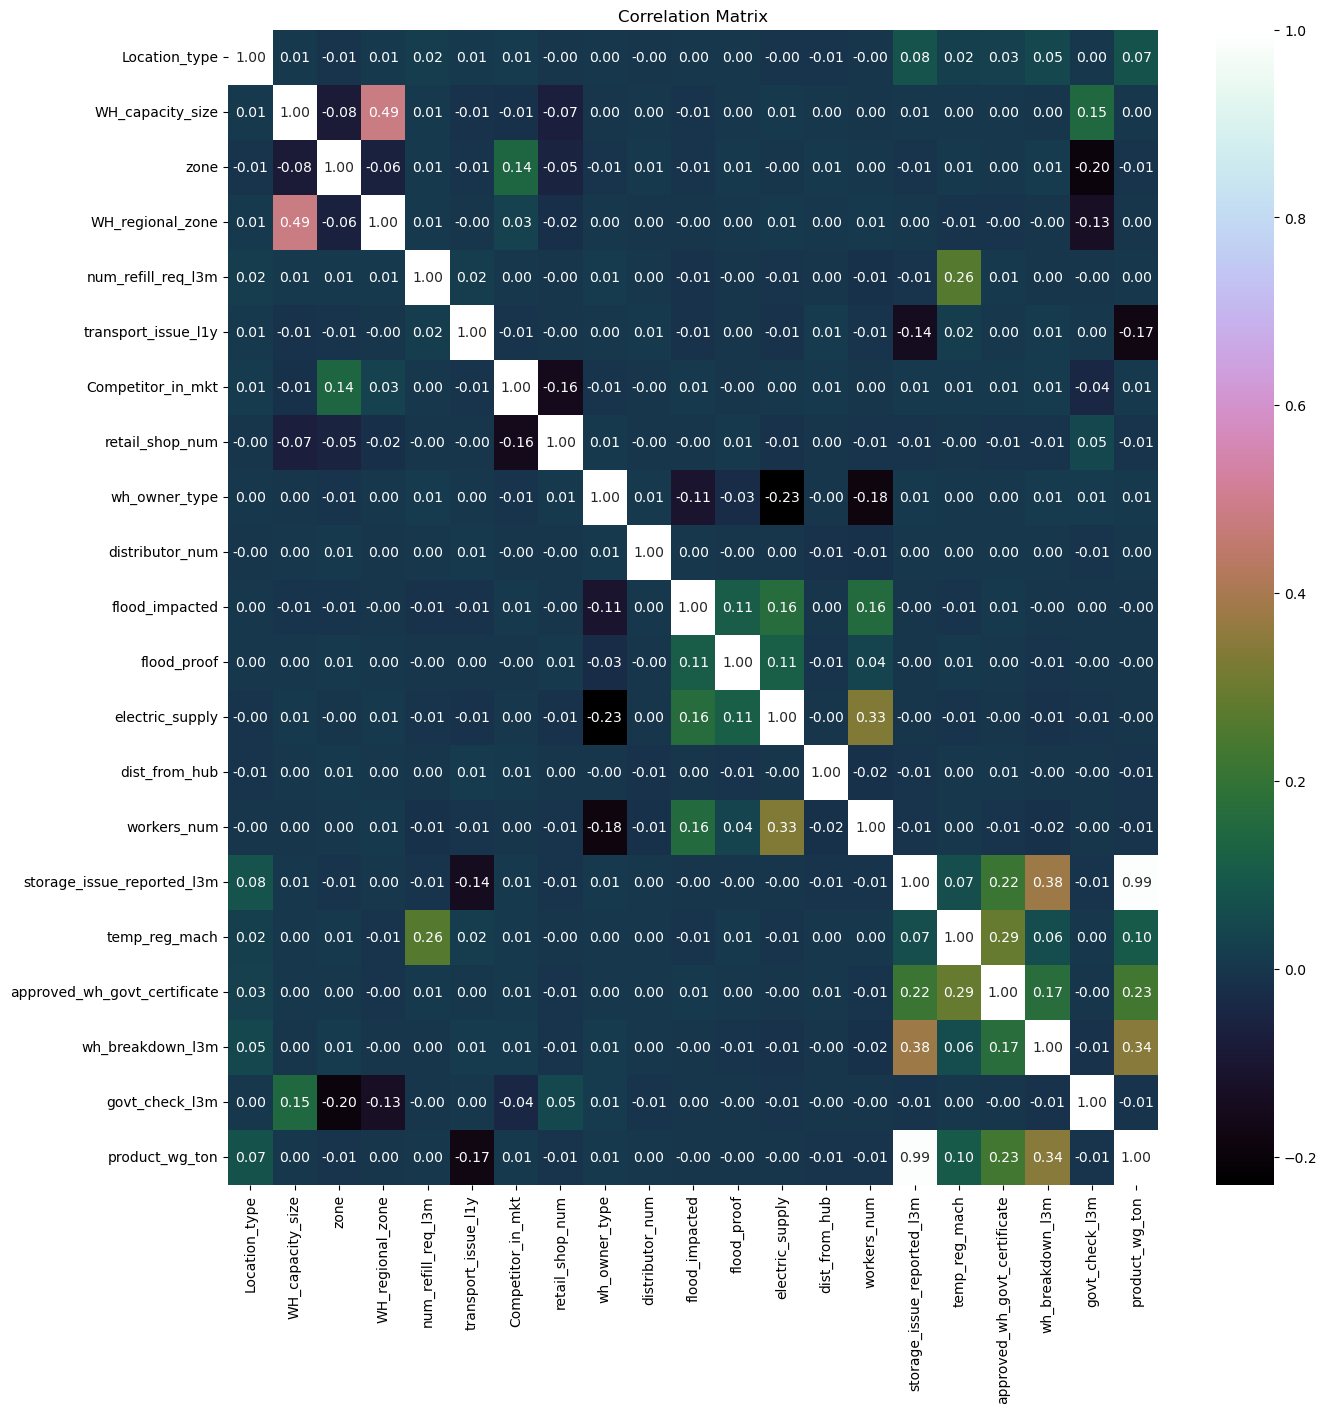

In [57]:
# Heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='cubehelix', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#### Positive Correlation:

Values close to 1 indicate a strong positive correlation, suggesting that as one variable increases, the other tends to increase as well.
For example, "product_wg_ton" has a very high positive correlation with "storage_issue_reported_l3m" (0.986777) and "workers_num" (0.333031).

#### Negative Correlation:

Values close to -1 indicate a strong negative correlation, suggesting that as one variable increases, the other tends to decrease.
For example, "zone" has a negative correlation with "WH_capacity_size" (-0.082726).
Correlation with the Target Variable:

It's important to look at the correlation of each variable with your target variable, "product_wg_ton." Features with higher absolute correlation values may have more predictive power.

## Scaling

In [58]:
X = df1.drop("product_wg_ton", axis = 1)
y = df1["product_wg_ton"]

#### Split the Data:

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scaling:

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

#### Transform the Test Set:

In [61]:
X_test_scaled = scaler.transform(X_test)

In [62]:
y_train = y_train.values
y_test = y_test.values

## Model Building

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_predictions = linear_model.predict(X_test_scaled)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

# Support Vector Regression (SVR)
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
svr_predictions = svr_model.predict(X_test_scaled)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_predictions = gb_model.predict(X_test_scaled)

# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluate the models using regression metrics
models = {'Linear Regression': linear_predictions, 'Random Forest': rf_predictions, 'SVR': svr_predictions,
          'Gradient Boosting': gb_predictions, 'Decision Tree': dt_predictions}

for model_name, predictions in models.items():
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f'\nMetrics for {model_name}:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'R-squared (R2): {r2}')

    # Additional metric
    rmse = np.sqrt(mse)
    print(f'Root Mean Squared Error (RMSE): {rmse}')


Metrics for Linear Regression:
Mean Squared Error (MSE): 3108074.8559098374
Mean Absolute Error (MAE): 1306.6568795682188
R-squared (R2): 0.9767707163588296
Root Mean Squared Error (RMSE): 1762.9732998289671

Metrics for Random Forest:
Mean Squared Error (MSE): 869420.13388062
Mean Absolute Error (MAE): 695.7267099999999
R-squared (R2): 0.9935020847857459
Root Mean Squared Error (RMSE): 932.4270126292031

Metrics for SVR:
Mean Squared Error (MSE): 5271158.166958098
Mean Absolute Error (MAE): 1734.6255198566203
R-squared (R2): 0.9606041572824675
Root Mean Squared Error (RMSE): 2295.9002955176643

Metrics for Gradient Boosting:
Mean Squared Error (MSE): 833322.459765049
Mean Absolute Error (MAE): 687.6785174177978
R-squared (R2): 0.9937718733686118
Root Mean Squared Error (RMSE): 912.864973457219

Metrics for Decision Tree:
Mean Squared Error (MSE): 1771373.4136
Mean Absolute Error (MAE): 883.0024
R-squared (R2): 0.9867610217364288
Root Mean Squared Error (RMSE): 1330.929529915089


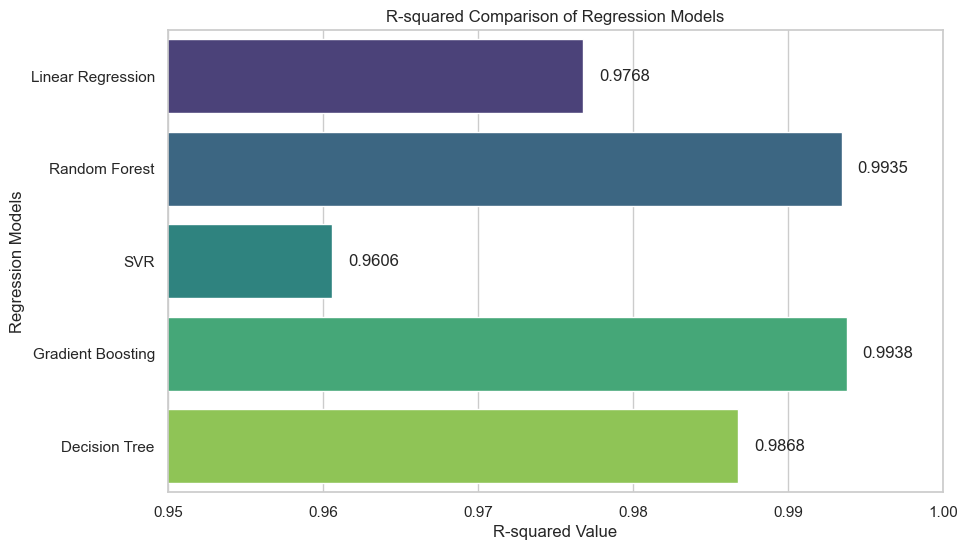

In [86]:
# Set the seaborn style
sns.set(style="whitegrid")

# Model names
models = ['Linear Regression', 'Random Forest', 'SVR', 'Gradient Boosting', 'Decision Tree']

# Corresponding R-squared values
r2_values = [0.9768, 0.9935, 0.9606, 0.9938, 0.9868]

# Plotting the horizontal bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=r2_values, y=models, palette='viridis', orient='h')
plt.title('R-squared Comparison of Regression Models')
plt.xlabel('R-squared Value')
plt.ylabel('Regression Models')
plt.xlim(0.95, 1.0)  # Adjust the x-axis limit for better visualization

# Display the R-squared values on the right of each bar
for i, value in enumerate(r2_values):
    plt.text(value + 0.001, i, f'{value:.4f}', ha='left', va='center')

plt.show()

## Recommendations:
1. Strategic Warehouse Placement: The analysis highlighted that most warehouses are situated in rural areas and the North zone. Leveraging this insight, supply chain managers can strategically allocate resources and streamline operations in these regions.

2. Storage Reporting Optimization: The strong positive correlation between storage reported during the last three months and product shipment underscores the importance of timely and accurate storage reporting. Implementing efficient reporting mechanisms can lead to improved sales outcomes.

3. Government Certification Focus: As a significant number of warehouses possess government-approved certificates of 'C' type, focusing on obtaining and maintaining such certifications can enhance credibility and trustworthiness.

4. Enhanced Predictive Modeling: By embracing the Gradient Boosting Regressor model with hyperparameter tuning, supply chain managers can harness its predictive prowess to optimize sales and inventory management.

As we conclude this journey, we stand at the threshold of empowered supply chain decision-making. Armed with insights, correlations, and predictive models, the future holds promise—a future where efficiency, accuracy, and profitability harmoniously intertwine.